In [65]:
# %pip install ace_tools_open

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import ace_tools_open as tools

import os

In [2]:
np.random.seed(42)

In [3]:
if os.path.exists("small_data.csv"):
	df = pd.read_csv("small_data.csv")
	print("Loaded the small data")
else:
	df = pd.read_csv("loan.csv")
	print("Loaded the orignal data")

Loaded the small data


In [4]:
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,0.0,199843.000000,...,942.0,942.000000,942.0,942.000000,739.000000,942.000000,942.000000,2916.000000,2916.000000,2916.000000
mean,NaN,NaN,15042.836625,15037.270875,15018.016696,13.092603,445.735626,7.792153e+04,NaN,18.813893,...,3.0,154.253960,3.0,13.897028,446.573058,11388.067887,188.206391,5077.059588,47.689222,13.170439
std,NaN,NaN,9171.962091,9169.706889,9174.064233,4.834885,266.772722,7.443695e+04,NaN,13.903082,...,0.0,122.933367,0.0,9.800833,353.359763,7194.548273,195.438886,3695.481612,6.797273,8.051768
min,NaN,NaN,500.000000,500.000000,0.000000,5.310000,15.910000,0.000000e+00,NaN,0.000000,...,3.0,5.360000,3.0,0.000000,16.080000,584.450000,0.010000,142.000000,18.920000,0.000000
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,9.490000,252.140000,4.600000e+04,NaN,11.860000,...,3.0,61.950000,3.0,5.000000,181.290000,5777.497500,42.140000,2242.102500,45.000000,6.000000
50%,NaN,NaN,12950.000000,12900.000000,12800.000000,12.620000,377.510000,6.500000e+04,NaN,17.840000,...,3.0,120.220000,3.0,15.000000,349.860000,9843.650000,121.885000,4256.615000,45.000000,14.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,15.990000,592.110000,9.300000e+04,NaN,24.520000,...,3.0,216.302500,3.0,22.000000,623.715000,15767.637500,273.762500,7000.000000,50.000000,18.000000
max,NaN,NaN,40000.000000,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,NaN,999.000000,...,3.0,825.570000,3.0,30.000000,2128.080000,36545.350000,1206.060000,27000.000000,100.000000,45.000000


In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 145 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    id                                          0 non-null       float64
 1    member_id                                   0 non-null       float64
 2    loan_amnt                                   200000 non-null  int64  
 3    funded_amnt                                 200000 non-null  int64  
 4    funded_amnt_inv                             200000 non-null  float64
 5    term                                        200000 non-null  object 
 6    int_rate                                    200000 non-null  float64
 7    installment                                 200000 non-null  float64
 8    grade                                       200000 non-null  object 
 9    sub_grade                                   200000 non-nu

In [7]:
null_percentages = df.isna().mean().mul(100).sort_values(ascending=False)
null_percentages

id                                            100.0000
url                                           100.0000
member_id                                     100.0000
orig_projected_additional_accrued_interest     99.6305
hardship_length                                99.5290
                                                ...   
out_prncp_inv                                   0.0000
out_prncp                                       0.0000
initial_list_status                             0.0000
hardship_flag                                   0.0000
addr_state                                      0.0000
Length: 145, dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['id', 'url', 'member_id'], inplace=True)

In [10]:
labels = null_percentages.index.tolist()
values = null_percentages.values.tolist()

fig = go.Figure(data=[
    go.Bar(
        x=labels,
        y=values,
        text=[f'{v:.1f}%' for v in values],  
        textposition='outside',  
        marker_color='red',  
        marker_line_color='darkred',
        marker_line_width=1  
    )
])

fig.update_layout(
    title='Percentage of Null Values',
    xaxis_title='Columns',
    yaxis_title='Percentage of Null Values (%)',
    yaxis=dict(range=[0, max(values) * 1.1]), 
    width=1280,
    height=720,
    showlegend=False,
    font=dict(size=12),
    bargap=0.2 
)

fig.show()

In [11]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             92248
Current                                                81417
Charged Off                                            23057
Late (31-120 days)                                      1947
In Grace Period                                          746
Late (16-30 days)                                        331
Does not meet the credit policy. Status:Fully Paid       180
Does not meet the credit policy. Status:Charged Off       72
Default                                                    2
Name: count, dtype: int64

In [12]:
df['loan_status'].value_counts()/len(df)*100

loan_status
Fully Paid                                             46.1240
Current                                                40.7085
Charged Off                                            11.5285
Late (31-120 days)                                      0.9735
In Grace Period                                         0.3730
Late (16-30 days)                                       0.1655
Does not meet the credit policy. Status:Fully Paid      0.0900
Does not meet the credit policy. Status:Charged Off     0.0360
Default                                                 0.0010
Name: count, dtype: float64

In [13]:
loan_status_value_counts = df['loan_status'].value_counts()
loan_status_labels = loan_status_value_counts.index.tolist()
loan_status_counts = loan_status_value_counts.values.tolist()

fig = go.Figure(data=[
    go.Bar(
        x=loan_status_labels,
        y=loan_status_counts,
        text=loan_status_counts, 
        textposition='outside',  
        textfont=dict(size=12, color='black'), 
        marker_color='red',  
        marker_line_color='darkred', 
        marker_line_width=1, 
        width=0.3
    )
])

fig.update_layout(
    title='Loan Status Counts',
    xaxis_title='Loan Status',
    yaxis_title='Number of Records',
    yaxis=dict(range=[0, max(loan_status_counts) * 1.2]), 
    width=800,  
    height=600,  
    showlegend=False, 
    font=dict(size=12),
    bargap=0.2,  
    margin=dict(t=100, b=100, l=100, r=100)
)

fig.show()

In [14]:
status_map = {
    'Fully Paid': 0, 
    'Current': 0, 
    'Charged Off': 1, 
    'Late (31-120 days)': 0, 
    'In Grace Period': 0, 
    'Late (16-30 days)': 0, 
    'Does not meet the credit policy. Status:Fully Paid': 0, 
    'Does not meet the credit policy. Status:Charged Off': 1, 
    'Default': 1
}

In [15]:
df['target'] = df['loan_status'].map(status_map)
df['target'].value_counts(normalize=True)

target
0    0.884345
1    0.115655
Name: proportion, dtype: float64

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,target
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,199843.000000,199996.000000,199996.000000,97524.000000,...,942.000000,942.0,942.000000,739.000000,942.000000,942.000000,2916.000000,2916.000000,2916.000000,200000.000000
mean,15042.836625,15037.270875,15018.016696,13.092603,445.735626,7.792153e+04,18.813893,0.305101,0.572991,34.609429,...,154.253960,3.0,13.897028,446.573058,11388.067887,188.206391,5077.059588,47.689222,13.170439,0.115655
std,9171.962091,9169.706889,9174.064233,4.834885,266.772722,7.443695e+04,13.903082,0.861753,0.886356,21.888122,...,122.933367,0.0,9.800833,353.359763,7194.548273,195.438886,3695.481612,6.797273,8.051768,0.319812
min,500.000000,500.000000,0.000000,5.310000,15.910000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.360000,3.0,0.000000,16.080000,584.450000,0.010000,142.000000,18.920000,0.000000,0.000000
1%,1600.000000,1600.000000,1500.000000,5.320000,54.129400,1.680000e+04,1.710000,0.000000,0.000000,2.000000,...,11.347400,3.0,0.000000,34.029600,1322.738300,0.040000,389.450000,31.563500,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.490000,252.140000,4.600000e+04,11.860000,0.000000,0.000000,16.000000,...,61.950000,3.0,5.000000,181.290000,5777.497500,42.140000,2242.102500,45.000000,6.000000,0.000000
50%,12950.000000,12900.000000,12800.000000,12.620000,377.510000,6.500000e+04,17.840000,0.000000,0.000000,31.000000,...,120.220000,3.0,15.000000,349.860000,9843.650000,121.885000,4256.615000,45.000000,14.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,592.110000,9.300000e+04,24.520000,0.000000,1.000000,50.000000,...,216.302500,3.0,22.000000,623.715000,15767.637500,273.762500,7000.000000,50.000000,18.000000,0.000000
99%,40000.000000,40000.000000,40000.000000,26.770000,1238.930000,2.660000e+05,42.440000,4.000000,4.000000,81.000000,...,549.741200,3.0,29.000000,1618.419600,32237.348800,829.931700,16543.750000,65.925500,24.000000,1.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,999.000000,26.000000,19.000000,176.000000,...,825.570000,3.0,30.000000,2128.080000,36545.350000,1206.060000,27000.000000,100.000000,45.000000,1.000000


In [17]:
cat_cols = df.select_dtypes('object').columns
for c in cat_cols:
    print(c, df[c].nunique(dropna=False))

term 2
grade 7
sub_grade 35
emp_title 73743
emp_length 12
home_ownership 6
verification_status 3
issue_d 139
loan_status 9
pymnt_plan 2
desc 11173
purpose 14
title 7957
zip_code 890
addr_state 51
earliest_cr_line 672
initial_list_status 2
last_pymnt_d 136
next_pymnt_d 82
last_credit_pull_d 130
application_type 2
verification_status_joint 4
sec_app_earliest_cr_line 535
hardship_flag 2
hardship_type 2
hardship_reason 10
hardship_status 4
hardship_start_date 25
hardship_end_date 27
payment_plan_start_date 27
hardship_loan_status 6
disbursement_method 2
debt_settlement_flag 2
debt_settlement_flag_date 62
settlement_status 4
settlement_date 70


In [18]:
df.drop(columns=['emp_title', 'title', 'desc'], inplace=True)

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns
corrs = df[num_cols.tolist()].corr()['target'].abs().sort_values(ascending=False)
corr_df = corrs.reset_index().rename(columns={'index':'feature', 'target':'abs_corr'})
tools.display_dataframe_to_user("univariate_correlations", corr_df.head(20))

univariate_correlations


Loading ITables v2.4.2 from the internet... (need help?)


In [20]:
for label in loan_status_labels:
	avg_intr = df[df['loan_status'] == label]['int_rate'].mean()
	print(f"Status: {label}\nMean interest rate: {avg_intr}\n")

Status: Fully Paid
Mean interest rate: 12.631070158702627

Status: Current
Mean interest rate: 12.769329869683238

Status: Charged Off
Mean interest rate: 15.736771913084963

Status: Late (31-120 days)
Mean interest rate: 15.781900359527478

Status: In Grace Period
Mean interest rate: 15.281126005361932

Status: Late (16-30 days)
Mean interest rate: 15.602477341389728

Status: Does not meet the credit policy. Status:Fully Paid
Mean interest rate: 13.840833333333336

Status: Does not meet the credit policy. Status:Charged Off
Mean interest rate: 14.369305555555554

Status: Default
Mean interest rate: 14.48



In [21]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [87]:
print(num_cols, cat_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_

In [23]:
null_percentages = df.isna().mean().mul(100)
null_threshold = 40
to_drop = null_percentages[null_percentages > null_threshold].index
print(list(to_drop))

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage',

In [24]:
df_cleaned = df.drop(columns=to_drop)
df_cleaned.shape

(200000, 98)

In [25]:
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [26]:
num_transformer = Pipeline([("imputer", SimpleImputer(strategy='median')), ("scaler", StandardScaler())])
obj_transformer = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        (
            "ordinal",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
        ),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("num", num_transformer, num_cols),
        ("cat", obj_transformer, cat_cols),
    ]
)

In [27]:
X_trans = preprocessor.fit_transform(X)

In [28]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)
rf.fit(X_trans, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [29]:
ordinal = preprocessor.named_transformers_['cat'].named_steps['ordinal']
ordinal_cols = ordinal.get_feature_names_out(cat_cols).tolist()
all_features = num_cols + ordinal_cols

In [30]:
importances = rf.feature_importances_
imp_series = pd.Series(importances, index=all_features).sort_values(ascending=False)
imp_df = imp_series.reset_index().rename(columns={'index':'feature', 0:'importance'})
tools.display_dataframe_to_user("model_feature_importances", imp_df.head(20))

model_feature_importances


Loading ITables v2.4.2 from the internet... (need help?)


In [31]:
selector = SelectFromModel(rf, threshold='mean', prefit=True)
selected_idx = selector.get_support(indices=True)
selected_feats = [all_features[i] for i in selected_idx]
tools.display_dataframe_to_user("selected_features", pd.DataFrame({'feature': selected_feats}))

selected_features


Loading ITables v2.4.2 from the internet... (need help?)


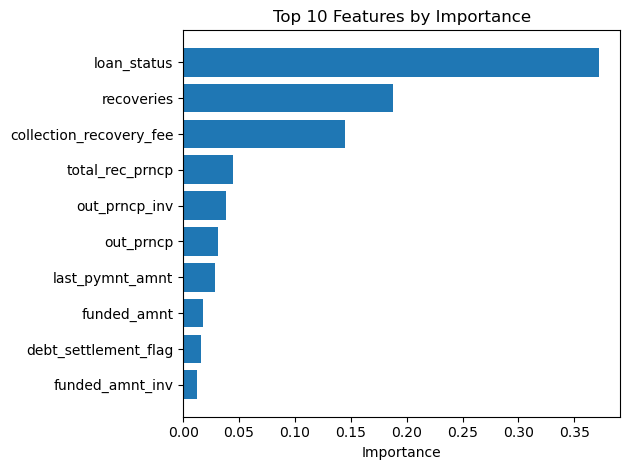

In [32]:
top10 = imp_series.head(10)
plt.figure()
plt.barh(top10.index[::-1], top10.values[::-1])
plt.xlabel("Importance")
plt.title("Top 10 Features by Importance")
plt.tight_layout()
plt.show()

In [33]:
X['purpose']

0         debt_consolidation
1           home_improvement
2         debt_consolidation
3             major_purchase
4         debt_consolidation
                 ...        
199995    debt_consolidation
199996    debt_consolidation
199997    debt_consolidation
199998    debt_consolidation
199999    debt_consolidation
Name: purpose, Length: 200000, dtype: object